In [1]:
import pandas as pd

## 数据连接

### concat连接

In [2]:
concat1=pd.read_csv('./data/concat_1.csv')
concat1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [3]:
concat2=pd.read_csv('./data/concat_2.csv')
concat2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [4]:
concat3=pd.read_csv('./data/concat_3.csv')
concat3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [5]:
# 行拼接
new_concat=pd.concat([concat1,concat2,concat3])
new_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [6]:
new_concat.loc[3]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [7]:
new_concat.iloc[3]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [8]:
# 忽略索引，重新排序
pd.concat([concat1,concat2,concat3],ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [9]:
s=pd.Series(['n1','n2','n3','n4'])
# 按列对齐拼接，外连接
pd.concat([concat1,s])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [10]:
# 指定内连接
concat3.columns=['A','C','E','F']
pd.concat([concat1,concat3],join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [11]:
# 列拼接，行对齐
pd.concat([concat1,concat2,concat3],axis=1)

,A,B,C,D,A,B,C,D,A,C,E,F
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


### merge关联数据

In [12]:
from sqlalchemy import create_engine

In [13]:
engine=create_engine('sqlite:///data/chinook.db')

In [14]:
tracks=pd.read_sql_table('tracks',engine.connect())
tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [15]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2525 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


### join关联

In [16]:
stock2016=pd.read_csv('./data/stocks_2016.csv')
stock2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [17]:
stock2017=pd.read_csv('./data/stocks_2017.csv')
stock2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [18]:
stock2018=pd.read_csv('./data/stocks_2018.csv')
stock2018

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [19]:
stock2016.join(stock2017,lsuffix='2016',rsuffix='2017',how='outer')

,Symbol2016,Shares2016,Low2016,High2016,Symbol2017,Shares2017,Low2017,High2017
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140
1,TSLA,50.0,80.0,130.0,GE,100,30,40
2,WMT,40.0,55.0,70.0,IBM,87,75,95
3,NaN,NaN,NaN,NaN,SLB,20,55,85
4,NaN,NaN,NaN,NaN,TXN,500,15,23
5,NaN,NaN,NaN,NaN,TSLA,100,100,300


In [20]:
# stock2018.set_index('Symbol')
stock2016.join(stock2018.set_index('Symbol'),lsuffix='2016',rsuffix='2018',on='Symbol')

,Symbol,Shares2016,Low2016,High2016,Shares2018,Low2018,High2018
0,AAPL,80,95,110,40.0,135.0,170.0
1,TSLA,50,80,130,50.0,220.0,400.0
2,WMT,40,55,70,NaN,NaN,NaN


## 缺失值处理

In [21]:
import numpy as np

### 缺失值含义

In [22]:
np.NaN

nan

In [23]:
np.NAN==True

False

In [24]:
np.nan==False

False

In [25]:
np.nan==0

False

In [26]:
np.NAN==""

False

In [27]:
np.nan==None

False

In [28]:
np.nan==np.nan

False

In [29]:
# 判断是否是缺失值
pd.isnull(np.nan)

True

### 加载包含缺失值的情况

In [30]:
pd.read_csv("./data/survey_visited.csv")

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [31]:
# 不读取缺失值
pd.read_csv("./data/survey_visited.csv",keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [32]:
# 指定某数据为缺失值
pd.read_csv("./data/survey_visited.csv",na_values=["DR-3"],keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,NaN,1939-01-07
3,735,NaN,1930-01-12
4,751,NaN,1930-02-26
5,752,NaN,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


### 缺失值统计

In [33]:
titanic=pd.read_csv("./data/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# 封装成缺失值统计函数
def miss_value_df(df):
    miss_value= df.isnull().sum()
    miss_percent=df.isnull().sum()/len(df)*100
    miss_df=pd.concat([miss_value,miss_percent],axis=1)
    miss_df.columns=['counts','percent']
    result=miss_df[miss_df.iloc[:,1]!=0].sort_values('counts',ascending=False)
    print(f'传入的df中共{df.shape[1]}列，其中{result.shape[0]}列存在缺失值，具体情况如下：')
    return result

In [36]:
miss_value_df(titanic)

传入的df中共12列，其中3列存在缺失值，具体情况如下：


,counts,percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


<AxesSubplot:>

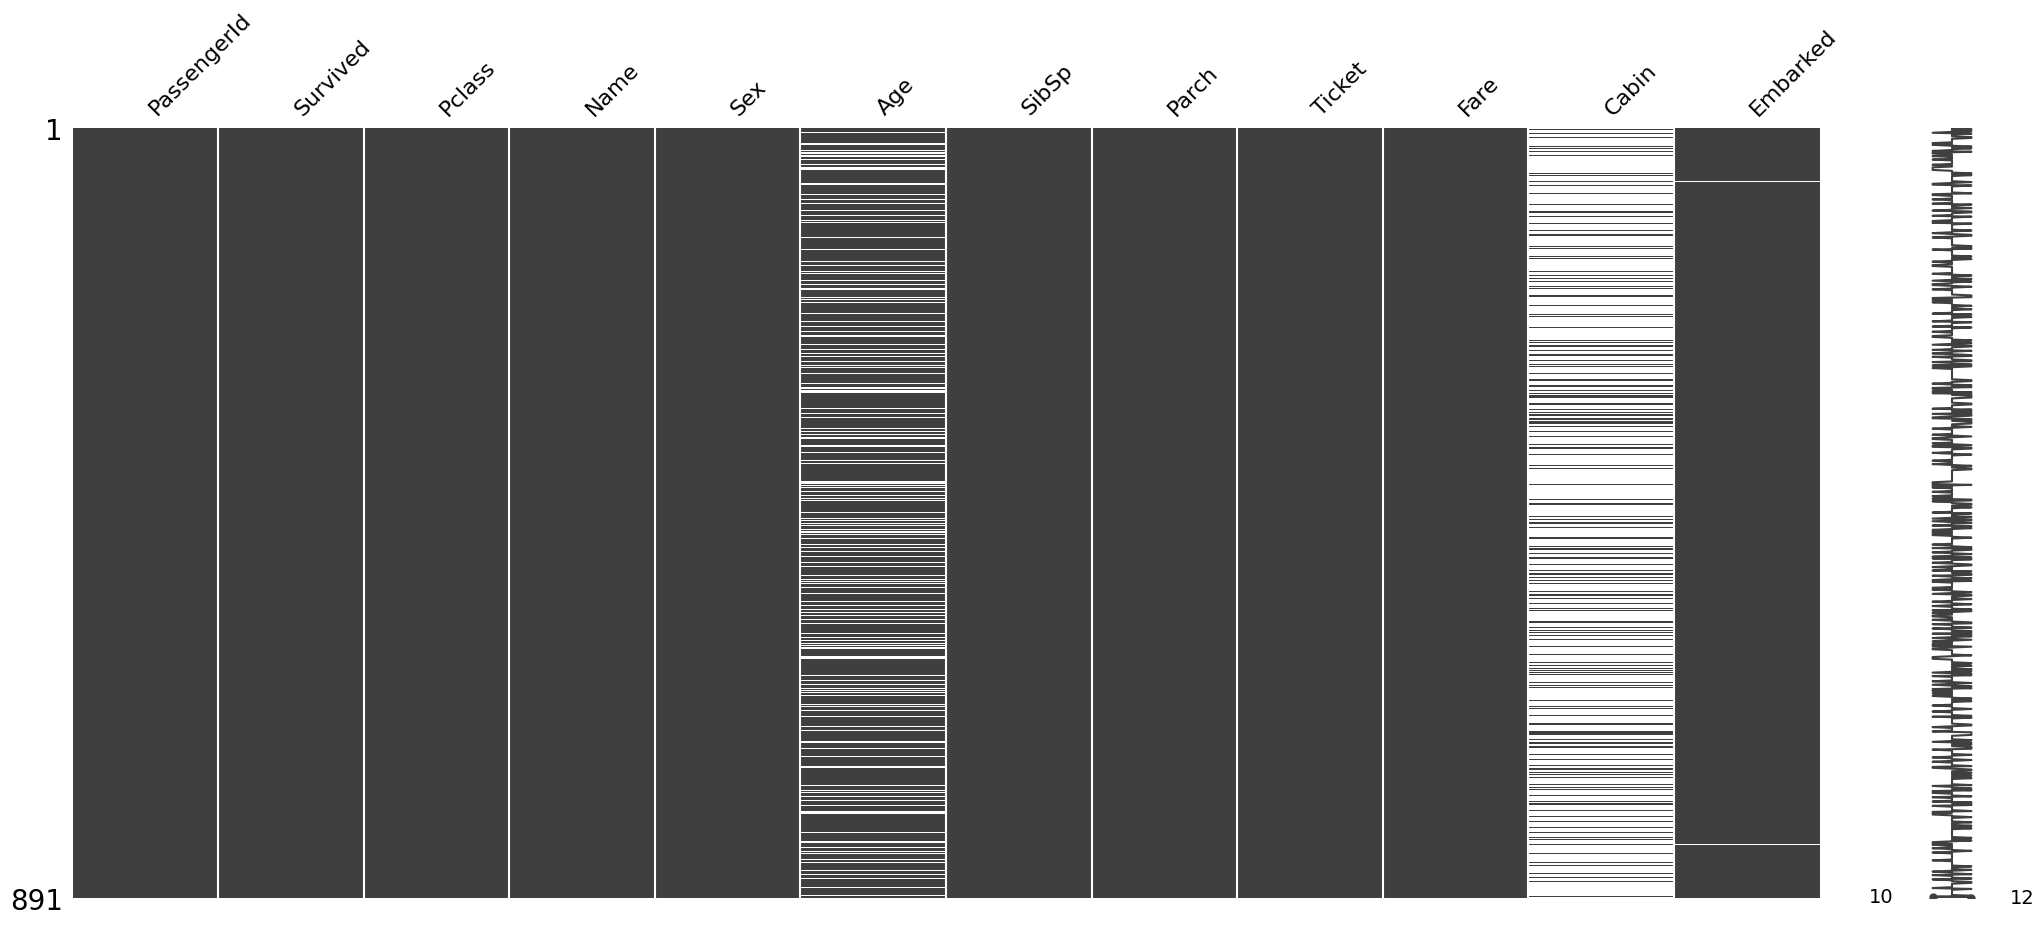

In [37]:
# 缺失值可视化
import missingno as msno
msno.matrix(titanic)

<AxesSubplot:>

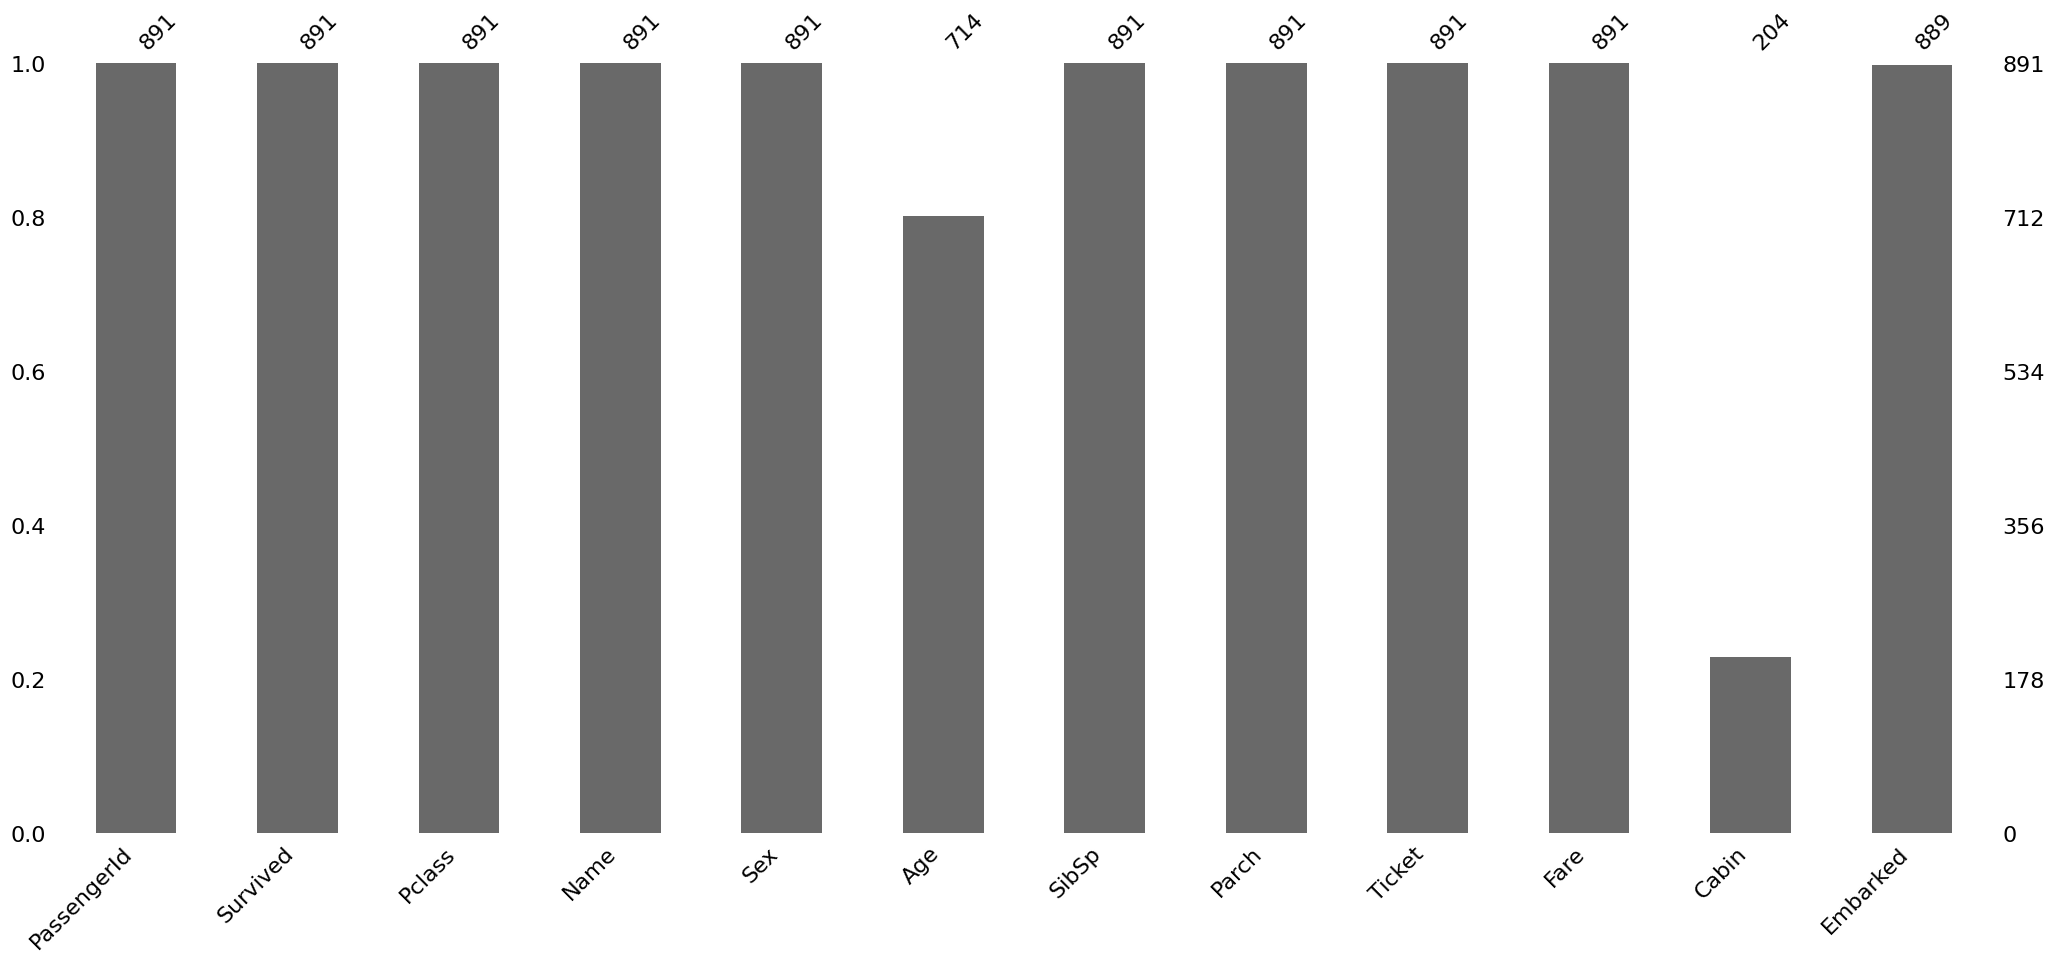

In [38]:
msno.bar(titanic)

<AxesSubplot:>

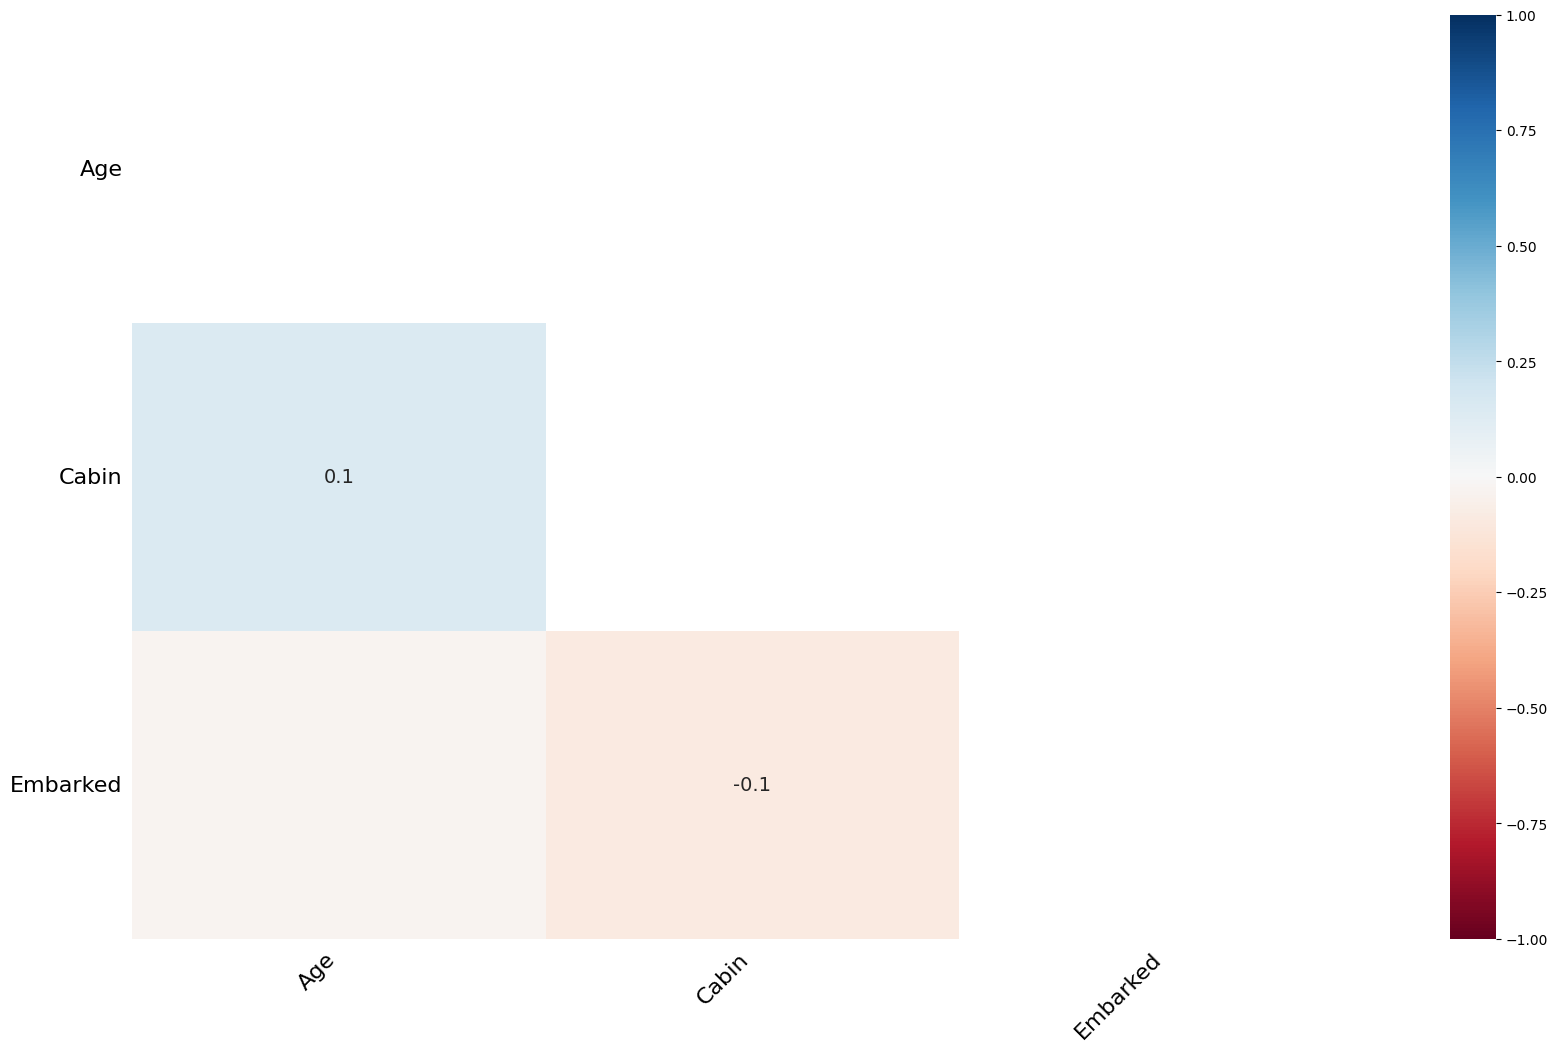

In [39]:
msno.heatmap(titanic)

### 缺失值删除

In [40]:
# 按行删除
titanic_copy=pd.read_csv('./data/titanic_train.csv')
titanic_copy.dropna(subset=['Age'],how="any",inplace=True)
miss_value_df(titanic_copy)

传入的df中共12列，其中2列存在缺失值，具体情况如下：


,counts,percent
Cabin,529,74.089636
Embarked,2,0.280112


In [41]:
# 按列删除
titanic_copy2=pd.read_csv('./data/titanic_train.csv')
titanic_copy2.drop(['Age'],axis=1,inplace=True)
miss_value_df(titanic_copy2)

传入的df中共11列，其中2列存在缺失值，具体情况如下：


,counts,percent
Cabin,687,77.104377
Embarked,2,0.224467


### 非时间序列缺失值填充

In [42]:
titanic_copy=pd.read_csv('./data/titanic_train.csv')
# 按默认值0进行填充
titanic_copy.fillna(0,inplace=True)
miss_value_df(titanic_copy)

传入的df中共12列，其中0列存在缺失值，具体情况如下：


,counts,percent


In [43]:
# 按统计值填充
titanic_copy2=pd.read_csv('./data/titanic_train.csv')
mean=titanic_copy2['Age'].mean()
titanic_copy2['Age'].fillna(mean,inplace=True)
miss_value_df(titanic_copy2)

传入的df中共12列，其中2列存在缺失值，具体情况如下：


,counts,percent
Cabin,687,77.104377
Embarked,2,0.224467


### 时间序列缺失值填充

In [44]:
# 时间序列缺失值填充
city=pd.read_csv('./data/city_day.csv',parse_dates=True,index_col='Date')
city

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [45]:
city_copy=pd.read_csv('./data/city_day.csv',parse_dates=True,index_col='Date')
miss_value_df(city_copy)

传入的df中共15列，其中14列存在缺失值，具体情况如下：


,counts,percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [46]:
city_copy['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [47]:
# 向前填充
city_copy.fillna(method='ffill', inplace=True)
city_copy['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [48]:
# 向后填充
city_copy['AQI'][20:35]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
2015-01-31    514.0
2015-02-01    782.0
2015-02-02    914.0
2015-02-03    660.0
2015-02-04    294.0
Name: AQI, dtype: float64

In [49]:
city_copy.fillna(method='bfill',inplace=True)
city_copy['AQI'][20:35]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
2015-01-31    514.0
2015-02-01    782.0
2015-02-02    914.0
2015-02-03    660.0
2015-02-04    294.0
Name: AQI, dtype: float64

In [50]:
# 线性填充
city_copy2=pd.read_csv('./data/city_day.csv',parse_dates=True,index_col='Date')
city_copy2.interpolate(limit_direction='both',inplace=True)
city_copy2['Xylene'][50:64]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
Name: Xylene, dtype: float64

## 数据整理

### melt宽数据变长数据

In [51]:
pew=pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [52]:
pd.melt(pew,id_vars='religion',var_name='income',value_name='counts').sort_values('religion')

,religion,income,counts
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
...,...,...,...
53,Unaffiliated,$20-30k,374
35,Unaffiliated,$10-20k,299
17,Unaffiliated,<$10k,217
161,Unaffiliated,>150k,258


### stack数据堆叠

In [53]:
state=pd.read_csv('./data/state_fruit.csv',index_col=0)
state

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [54]:
state_stack=state.stack()
state_stack

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [55]:
# 变成Series，左边两列为行标签
type(state_stack)

pandas.core.series.Series

In [56]:
state_stack.reset_index()

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


### wide_to_long

In [57]:
movie=pd.read_csv('./data/movie.csv')
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [58]:
move_actor=movie[['movie_title',
      'actor_1_name','actor_1_facebook_likes',
      'actor_2_name','actor_2_facebook_likes',
      'actor_3_name','actor_3_facebook_likes']]
move_actor

,movie_title,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes
0,Avatar,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0
2,Spectre,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0
3,The Dark Knight Rises,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN
...,...,...,...,...,...,...,...
4911,Signed Sealed Delivered,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,318.0
4912,The Following,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,319.0
4913,A Plague So Pleasant,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,0.0
4914,Shanghai Calling,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,489.0


In [61]:
move_actor.columns=['movie_title',
      'actor_name_1','actor_facebook_likes_1',
      'actor_name_2','actor_facebook_likes_2',
      'actor_name_3','actor_facebook_likes_3']
# move_actor
move_actor_long=pd.wide_to_long(move_actor,stubnames=['actor_name','actor_facebook_likes'],i=['movie_title'],j='actor_num',sep='_').reset_index()
move_actor_long

,movie_title,actor_num,actor_name,actor_facebook_likes
0,Avatar,1,CCH Pounder,1000.0
1,Pirates of the Caribbean: At World's End,1,Johnny Depp,40000.0
2,Spectre,1,Christoph Waltz,11000.0
3,The Dark Knight Rises,1,Tom Hardy,27000.0
4,Star Wars: Episode VII - The Force Awakens,1,Doug Walker,131.0
...,...,...,...,...
14743,Signed Sealed Delivered,3,Crystal Lowe,318.0
14744,The Following,3,Sam Underwood,319.0
14745,A Plague So Pleasant,3,David Chandler,0.0
14746,Shanghai Calling,3,Eliza Coupe,489.0


In [62]:
move_actor_long[move_actor_long['movie_title']=='Avatar']

,movie_title,actor_num,actor_name,actor_facebook_likes
0,Avatar,1,CCH Pounder,1000.0
4916,Avatar,2,Joel David Moore,936.0
9832,Avatar,3,Wes Studi,855.0


## 类型转换

In [63]:
tips=pd.read_csv('./data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [64]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [65]:
tips['tip_str']=tips['tip'].astype(str)
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_str        object
dtype: object

In [66]:
tip_miss=tips.head(10)
tip_miss.loc[[1,2,5],'total_bill']='miss'
tip_miss

C:\Users\81086\AppData\Local\Temp\ipykernel_13560\4045854701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tip_miss.loc[[1,2,5],'total_bill']='miss'


,total_bill,tip,sex,smoker,day,time,size,tip_str
0,16.99,1.01,Female,No,Sun,Dinner,2,1.01
1,miss,1.66,Male,No,Sun,Dinner,3,1.66
2,miss,3.50,Male,No,Sun,Dinner,3,3.5
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61
5,miss,4.71,Male,No,Sun,Dinner,4,4.71
6,8.77,2.00,Male,No,Sun,Dinner,2,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4,3.12
8,15.04,1.96,Male,No,Sun,Dinner,2,1.96
9,14.78,3.23,Male,No,Sun,Dinner,2,3.23


In [67]:
pd.to_numeric(tip_miss['total_bill'],errors='coerce')

0    16.99
1      NaN
2      NaN
3    23.68
4    24.59
5      NaN
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64

In [68]:
pd.to_numeric(tip_miss['total_bill'],errors='ignore')

0    16.99
1     miss
2     miss
3    23.68
4    24.59
5     miss
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: object